In [14]:
#Import libraries 
import os
import pandas as pd
import matplotlib.pyplot as plt

**Error checking: loading a file if does not exist**

In [15]:
#Loading a file if it exists
def load_data(file_path):
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        print(f"File '{file_path}' loaded successfully.")
        return df
    else:
        print(f"File '{file_path}' does not exist.")
        return None

In [16]:
# Applied usage to exercise dataset
file_path = 'Flight_data.csv'  
loaded_data = load_data(file_path)
df = pd.read_csv(file_path)

if loaded_data is not None:
    print(loaded_data.head(5))

File 'Flight_data.csv' loaded successfully.
   Unnamed: 0   airline   flight source_city departure_time stops  \
0           0  SpiceJet  SG-8709       Delhi        Evening  zero   
1           1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2           2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3           3   Vistara   UK-995       Delhi        Morning  zero   
4           4   Vistara   UK-963       Delhi        Morning  zero   

    arrival_time destination_city    class  duration  days_left  price  
0          Night           Mumbai  Economy      2.17          1   5953  
1        Morning           Mumbai  Economy      2.33          1   5953  
2  Early_Morning           Mumbai  Economy      2.17          1   5956  
3      Afternoon           Mumbai  Economy      2.25          1   5955  
4        Morning           Mumbai  Economy      2.33          1   5955  


**For the same direct flight calculate the longest/shortest/mean duration and price**

In [17]:
#Filter for direct flights(stops == zero)
direct_flights = df[df['stops']== 'zero']

In [18]:
#Group by source and destination + calculate the min/max/mean duration
flight_stats_duration = direct_flights.groupby(['source_city', 'destination_city'])['duration'].agg(['min', 'max', 'mean'])

In [19]:
#Display the results
print("Flight Duration Statistics for Flights:")
print(flight_stats_duration)

Flight Duration Statistics for Flights:
                               min   max      mean
source_city destination_city                      
Bangalore   Chennai           0.83  1.17  1.044125
            Delhi             2.58  3.00  2.773808
            Hyderabad         1.00  1.67  1.222717
            Kolkata           2.33  3.17  2.528473
            Mumbai            1.33  2.00  1.792557
Chennai     Bangalore         0.83  1.50  1.138333
            Delhi             2.42  3.08  2.786882
            Hyderabad         1.00  1.42  1.229007
            Kolkata           2.00  2.58  2.391670
            Mumbai            1.75  2.25  1.979359
Delhi       Bangalore         2.50  3.17  2.783256
            Chennai           2.75  3.00  2.848963
            Hyderabad         1.92  2.42  2.222434
            Kolkata           2.08  2.67  2.195788
            Mumbai            2.00  2.50  2.213791
Hyderabad   Bangalore         0.92  1.83  1.238432
            Chennai           1.17  1.50  

**Group Bar Chart for average duration**

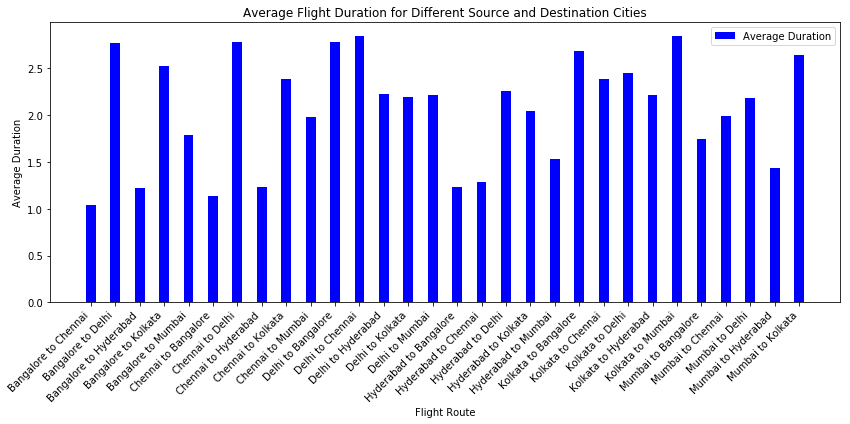

In [20]:
# Extract only the rows with the mean duration
average_duration_df = flight_stats_duration['mean'].reset_index()

# Grouped bar chart for average duration
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.4
bar_positions = range(len(average_duration_df))

ax.bar(
    bar_positions,
    average_duration_df['mean'],
    bar_width,
    color='blue',  # You can customize the color
    label='Average Duration'
)

# Customize the plot
ax.set_xticks(bar_positions)
ax.set_xticklabels([f"{source} to {dest}" for source, dest in zip(average_duration_df['source_city'], average_duration_df['destination_city'])], rotation=45, ha='right')
ax.set_xlabel('Flight Route')
ax.set_ylabel('Average Duration')
ax.legend()

plt.title('Average Flight Duration for Different Source and Destination Cities')
plt.tight_layout()  # Adjust layout for better appearance
plt.show()

In [21]:
#Group by source and destination + calculate the min/max/mean price
flight_stats_price = direct_flights.groupby(['source_city', 'destination_city'])['price'].agg(['min', 'max', 'mean'])

In [22]:
#Display the results
print("Flight Price Statistics for Flights:")
print(flight_stats_price)

Flight Price Statistics for Flights:
                               min    max          mean
source_city destination_city                           
Bangalore   Chennai           1603  12136   2329.608333
            Delhi             4071  59573  13215.595206
            Hyderabad         1714  15360   3041.762557
            Kolkata           3393  25000   4775.904192
            Mumbai            2150  40024   7519.493578
Chennai     Bangalore         1443  12000   2101.504444
            Delhi             2051  56878  12463.246531
            Hyderabad         1105  15000   2660.925094
            Kolkata           2359  25600   5792.919662
            Mumbai            1830  36864   9015.339744
Delhi       Bangalore         4007  59509  13130.285064
            Chennai           2049  56950  11628.027911
            Hyderabad         2022  38470   9775.861687
            Kolkata           2482  59224  11156.082863
            Mumbai            2281  58216  11136.777284
Hyderabad  

**Group Bar Chart for average price**

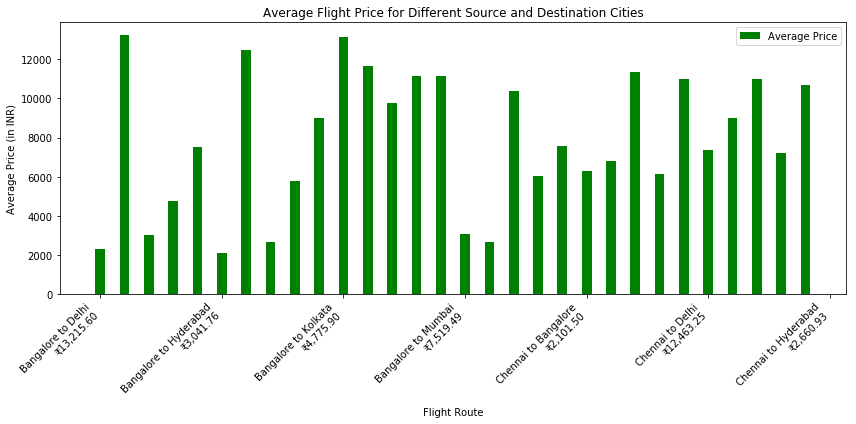

In [24]:
# Extract only the rows with the mean duration
average_price_df = flight_stats_price['mean'].reset_index()

# Grouped bar chart for average duration
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.4
bar_positions = range(len(average_price_df))

ax.bar(
    bar_positions,
    average_price_df['mean'],
    bar_width,
    color='green',  # You can customize the color
    label='Average Price'
)

# Customize the plot
ax.set_xticklabels([f"{source} to {dest}\n₹{mean_price:,.2f}" for source, dest, mean_price in zip(average_price_df['source_city'], average_price_df['destination_city'], average_price_df['mean'])], rotation=45, ha='right')
ax.set_xlabel('Flight Route')
ax.set_ylabel('Average Price (in INR)')
ax.legend()

plt.title('Average Flight Price for Different Source and Destination Cities')
plt.tight_layout()  # Adjust layout for better appearance
plt.show()